In [2]:
# Packages for EDA
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

# Packages for PostgreSQL Import
import psycopg2

# Custom packages with database connection information (Not working)
    #from projectname.config import dbname, username, pswd

In [3]:
# Ideally I'll move this into the project config.py file
# Otherwise for now I have to just manually assign . . .

dbname = "freelance_db"
username = "Metaverse"
pswd = "Arcifice91"

In [4]:
# Connect to Data (from: scraping_data.ipynb)

con = None
con = psycopg2.connect(database = dbname, user = username, host='localhost', password=pswd)

# Column reference
sql_query = """SELECT * FROM INFORMATION_SCHEMA.TABLES;"""
col_ref = pd.read_sql_query(sql_query,con)
col_ref[col_ref['table_schema'] == "public"]['table_name']

0           freelance_db
3          details_table
7     user_details_table
10       freelance_table
Name: table_name, dtype: object

In [21]:
# Checking shapes of tables
sql_query = """SELECT * from user_details_table;"""
dtls_table = pd.read_sql_query(sql_query, con)

sql_query = """SELECT * from freelance_table;"""
fl_table = pd.read_sql_query(sql_query, con)

print(dtls_table.shape)
print(fl_table.shape)

(1020, 9)
(4539, 10)


In [22]:
# Creating merged dataset
dtls_table['profile_url'] = "https://www.guru.com"+dtls_table['profile_url']

In [63]:
all_table = pd.merge(fl_table, dtls_table, on='profile_url')
all_table.shape
all_table = all_table.drop(columns=(['index_x']))
all_table = all_table.drop_duplicates(subset='profile_url')
print(all_table.shape)

(979, 17)


### EDA for 'all_table'

1. Remove 4 obs of someone from Punjab

In [66]:
# Basic descriptives: Outcome - hourly_rate
all_table['hourly_rate'].mean()

31.93667007150153

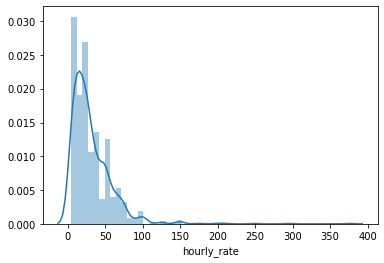

In [67]:
# Distribution
sns.distplot(all_table['hourly_rate'])

In [68]:
# Number of different cities and states?
print("Number of cities: " + str(all_table['city'].nunique()))
print("Number of states: " + str(all_table['state'].nunique()))

Number of cities: 660
Number of states: 50


In [70]:
# All United States? Yes.
#print(all_table['state'].drop_duplicates())

In [71]:
# Can do much much much more from here:
    # 1. Different cities
        # - rate distribution by city?
        # - Number of unique obs by city?
        # - Create a map?
    # 2. Inspect skills
        # - Number of different skills?
        # - Which skills are the most common? How does rate vary within those?
        # - Group skills (???) and calculate hourly rate 
        #   distribution by those groupings
    # 3. Inspect description
        # - Text analysis of some kind.
        # - Also will need to go back and scrape info from the user pages.
        #   Could also try Selenium but may be faster to just scrape on static page.
        #   Nvm. Will have to use Selenium.

### Inspecting the outcome (hourly rate) by state

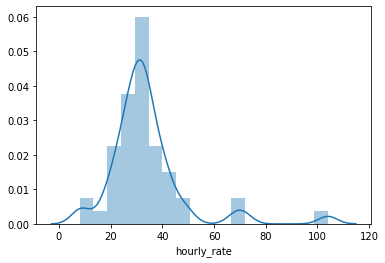

In [72]:
# Distribution of hourly rates by state?
sns.distplot(all_table.drop_duplicates().groupby('state').mean()['hourly_rate'])

# Pretty much a normal distrbution aside from a few outliers (who are they?)

In [74]:
# Top five states with highest average hourly rates
print("Five states with the highest average hourly rates")
print(all_table.groupby('state').mean()['hourly_rate'].sort_values(ascending=False)[0:5,])
print("Five states wit hteh lowest average hourly rates")
print(all_table.groupby('state').mean()['hourly_rate'].sort_values(ascending=True)[0:5,])

# Well, here they are. Mississippi with a mean HR or 104! and then RI & MT ~= 70!
# Similarly have a couple of low end states: ND and AK @ ~= 8.5
# Everyone else respects the normal distribution

Five states with the highest average hourly rates
state
Mississippi     104.000000
Rhode Island     71.500000
Montana          68.333333
Vermont          49.800000
Utah             47.500000
Name: hourly_rate, dtype: float64
Five states wit hteh lowest average hourly rates
state
North Dakota     8.000000
Arkansas         9.142857
Nebraska        16.666667
Idaho           19.500000
Puerto Rico     20.000000
Name: hourly_rate, dtype: float64


Counts of observations by state


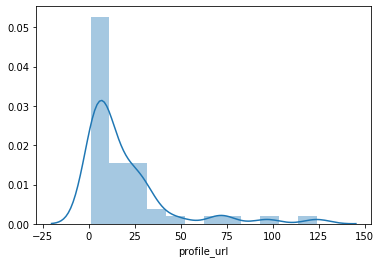

In [81]:
# What are the counts within each state?
print("Counts of observations by state")
dt_tmp = all_table.groupby('state').count()['profile_url'].sort_values(ascending=False)
sns.distplot(dt_tmp)

# Ooof, really small obs in some states.

In [88]:
# Counts within each state
print("Five states with lowest counts")
print(all_table.groupby('state').count()['profile_url'].sort_values(ascending=True)[0:5])

print("Five states with largest counts")
print(all_table.groupby('state').count()['profile_url'].sort_values(ascending=False)[0:5])

# No one in some states and alot of people in other states . . .

Five states with lowest counts
state
North Dakota     1
Wyoming          2
West Virginia    2
South Dakota     2
Rhode Island     2
Name: profile_url, dtype: int64
Five states with largest counts
state
California      124
Florida          97
New York         74
Texas            70
Pennsylvania     49
Name: profile_url, dtype: int64


### Looking at "Rating"

In [94]:
# Distrbution of ratings - First I have to clean it up
all_table.rating = all_table.rating.replace('$','').

AttributeError: 'Series' object has no attribute 'to_numeric'

### Inspecting the number of skills and outcome by it